# <center><font color='Blue' face='comic sans ms'> British Airways sentiment analysis and Predictive Modeling  Of  Customer Bookings </font></center> 

<font color = 'brawn'> Name: </font> Toukap Fotso Jucelin Armand

<font color = 'brawn'> Mail: </font> armandtoukap4@gmail.com

<font color = 'brawn'> Batch: </font>DST 20823

<font color = 'brawn'> Starting date: </font> September 2023

<b>Problem on Hand: </b> British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.
our goal consist of applying analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue</b>

# Outline
1. web scaping
2. analyse data
3. explore and prepare the data
4. Model Building
5. Model Evaluation

In [1]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for preprocessing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# import libraries for web scrapping
import requests
from bs4 import BeautifulSoup

#import libraries for sentment analysis
from nltk.sentiment import vader
import requests
from collections import Counter
from wordcloud import WordCloud


# Import libraries for train test split
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## <font color='Indigo' face='Cursive'> web scraping </font>

Our data is found in the following website sing the link: [https://www.airlinequality.com/airline-reviews/british-airways]. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.




In [2]:

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")



Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()


,reviews
0,✅ Trip Verified | My son and I flew to Geneva...
1,✅ Trip Verified | For the price paid (bought ...
2,✅ Trip Verified | Flight left on time and arr...
3,✅ Trip Verified | Very Poor Business class pr...
4,Not Verified | This review is for LHR-SYD-LHR....


<font color = 'Magenta'> result: </font>
The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if we want to collect more data, we need to increase  the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.


## <font color='Indigo' face='Cursive'> data analysis </font> 

#### <font color='Red' face='Cursive'> insights </font>
This Jupyter notebook includes some code to generate insights on what we learnt from the data. We will use a package called `NLTK` to perform sentiment analysis.

#### <font color='Red' face='Cursive'> Graphs and plots </font>
We will then use a package called `matplotlib` to perform plot charts and graphs

In [4]:
# Read in the reviews data from a CSV file
sentiment_analysis_df = pd.read_csv("BA_reviews.csv")
sentiment_analysis_df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | British Airways has a total...
1,1,"✅ Trip Verified | London Heathrow to Keflavik,..."
2,2,✅ Trip Verified | Mumbai to London Heathrow in...
3,3,✅ Trip Verified | Care and support shocking. ...
4,4,✅ Trip Verified | Flying A380 business class ...


In [5]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df.head()

,Unnamed: 0,reviews,SENTIMENT
0,0,✅ Trip Verified | British Airways has a total...,-0.8370
1,1,"✅ Trip Verified | London Heathrow to Keflavik,...",0.7218
2,2,✅ Trip Verified | Mumbai to London Heathrow in...,0.9698
3,3,✅ Trip Verified | Care and support shocking. ...,-0.0752
4,4,✅ Trip Verified | Flying A380 business class ...,-0.9475


In [6]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,Unnamed: 0,reviews,SENTIMENT,SENTIMENT_TYPE
0,0,✅ Trip Verified | British Airways has a total...,-0.8370,negative
1,1,"✅ Trip Verified | London Heathrow to Keflavik,...",0.7218,positive
2,2,✅ Trip Verified | Mumbai to London Heathrow in...,0.9698,positive
3,3,✅ Trip Verified | Care and support shocking. ...,-0.0752,negative
4,4,✅ Trip Verified | Flying A380 business class ...,-0.9475,negative
...,...,...,...,...
3638,3638,Flew LHR - VIE return operated by bmi but BA a...,0.9840,positive
3639,3639,LHR to HAM. Purser addresses all club passenge...,0.8720,positive
3640,3640,My son who had worked for British Airways urge...,0.4516,positive
3641,3641,London City-New York JFK via Shannon on A318 b...,0.9148,positive


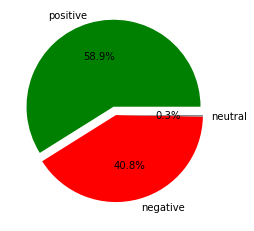

In [7]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

<font color = 'Magenta'> result: </font>
Out of 2000 reviews, 1096 were positive, 898 were negative and 
6 were neutral. This means the majority of reviews were 
polarised as either positive or negative

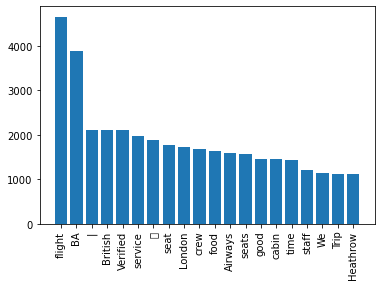

In [8]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['reviews']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

<font color = 'Magenta'> result: </font>
The frequency chart below shows that the key topics within the reviews include “flight”, “London”, “service” and “crew”, showing that 
people are actively talking about their experience and staff

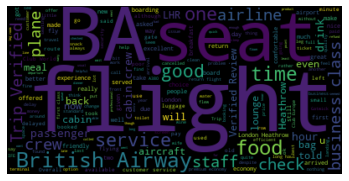

In [9]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['reviews']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

<font color = 'Magenta'> result: </font>
- The word cloud also showed similar words and key topics within the reviews. This includes “flight”, “BA”, “seat” and “time”. 
- showing thatpeople are actively talking about their experience and staff


## <font color='Indigo' face='Cursive'> predictive modeling of customer bookings </font>
### <font color='red' face='Cursive'> Exploratory data analysis</font>

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.


In [10]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


<font color = 'Magenta'> result: </font>
The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<font color = 'Magenta'> result: </font>
The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [16]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<font color = 'Magenta'> result: </font>
The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.


### <font color='red' face='Cursive'>data visualization</font>

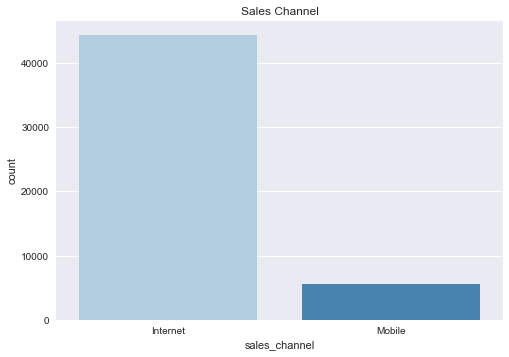

In [17]:
# sales channel
plt.style.use('seaborn')
sns.countplot(x='sales_channel',data=df ,palette='Blues')
plt.title('Sales Channel')
sns.despine()

<font color = 'Magenta'> result: </font> Internet is the highly sale channel over mobile

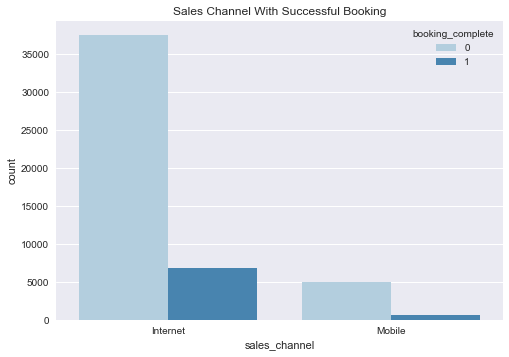

In [18]:
# sales channel with successful booking
sns.countplot(x='sales_channel',data=df,hue='booking_complete',palette='Blues')
plt.title('Sales Channel With Successful Booking')
sns.despine()

<font color = 'Magenta'> result: </font> Internet has the most successfull booking on sales channel

In [19]:
# sales channel in %
internet_sale = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
mobile_sale = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100
print(f"Number of bookings done through internet: {internet_sale} %")
print(f"Number of bookings done through phone call: {mobile_sale} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


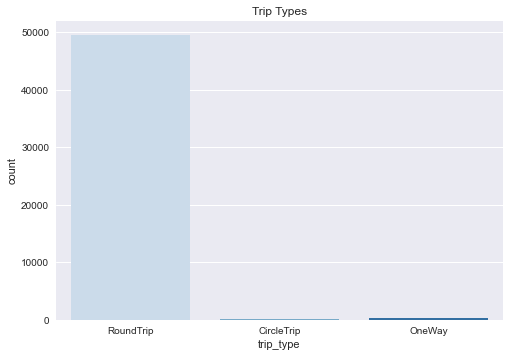

In [20]:
# tripe types
sns.countplot(x='trip_type',data=df,palette='Blues')
plt.title('Trip Types')
sns.despine()

<font color = 'Magenta'> result: </font> round trip is the most type trip use

In [21]:
# trip type in %
round_trip = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
oneway_trip = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
circle_trip = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {round_trip} %")
print(f"Percentage of One way trips: {oneway_trip} %")
print(f"Percentage of circle trips: {circle_trip} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


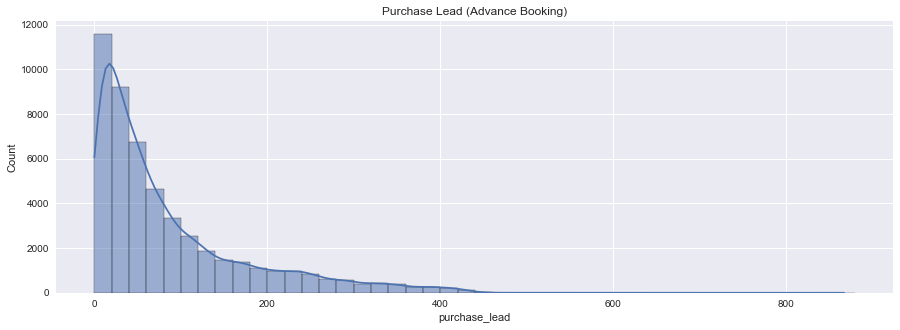

In [22]:
# purchase lead
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)
plt.title('Purchase Lead (Advance Booking)')
plt.show()

<font color = 'Magenta'> result: </font>
From the above visualization we can understand that most of the purchase lead (advance booking) is in between 0 to 600 days there for the purchase lead which is more than 600 days we will treat them as outliers to increase the accuracy of the predictive modeling

In [23]:
# Checking the purchase lead with more than 600 days
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

<font color = 'Magenta'> result: </font> There are only 8 purchase lead with more than 600 days of advance booking hence we will remove them

In [24]:
# data with more than 600 days of purchase lead
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,7,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,3,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,2,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,6,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,5,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,4,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,5,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,1,KIXMLE,Japan,0,0,1,7.00,1


In [25]:
# filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead <600 ]

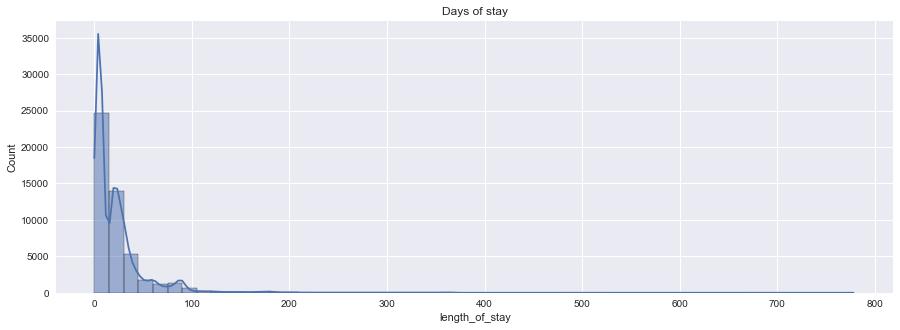

In [26]:
# Length Of Stay
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)
plt.title('Days of stay')
plt.show()

<font color = 'Magenta'> result: </font>
From the above visualization we can understand that most of the length of stays (days stay) is in between 0 to 100 but we also have length of stay with more than 100 . hence we will focus on the length of stay till 500 days

In [27]:
# Checking the data for length of stay with more then 100 days
(df.length_of_stay> 100).value_counts()

False    48854
True      1138
Name: length_of_stay, dtype: int64

In [28]:
# Checking the data for length of stay with more then 500 days with successful bookinh
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

<font color = 'Magenta'> result: </font>
We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.

In [29]:
# filtering the data to have only length of stay less than 500 days
data = df[df.purchase_lead <500 ]

In [30]:
data.shape       # filterd data shape

(49982, 14)

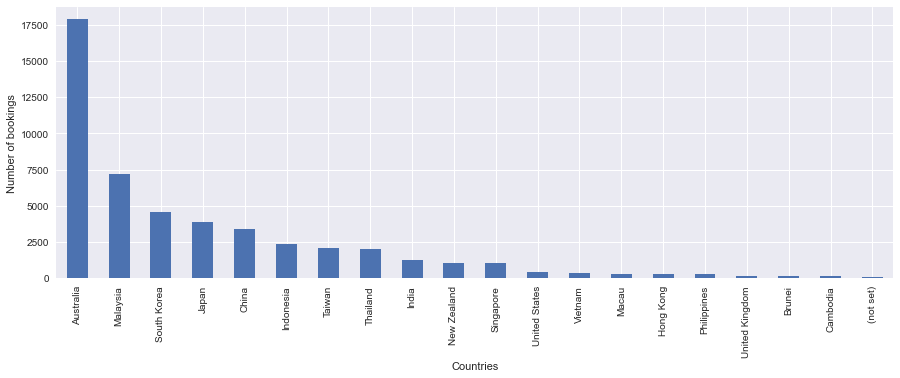

In [31]:
# travellers from which country had maximum booking applications (top 20 countrys)
plt.figure(figsize=(15,5))
ax = data.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")
plt.show()

<font color = 'Magenta'> result: </font> country with maximum booking is Australia

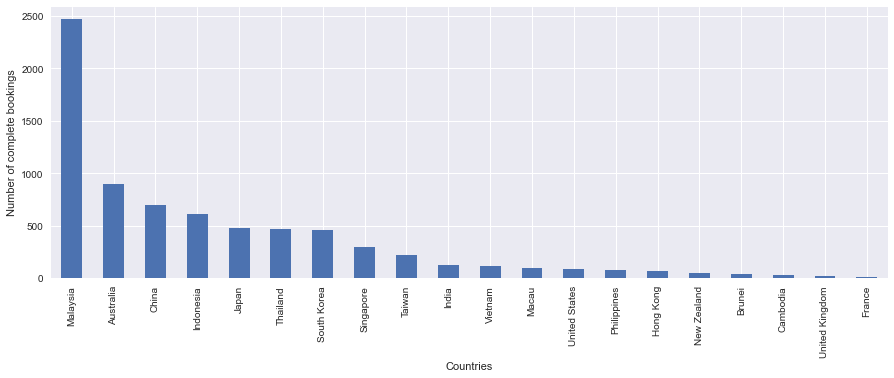

In [32]:
# travellers from which country had their booking complete (top 20 countrys)
plt.figure(figsize=(15,5))
ax = data[data.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel('Countries')
ax.set_ylabel('Number of complete bookings')
plt.show()

<font color = 'Magenta'> result: </font> countries with most booking customers are respectively: Australia,Malaysia,South Korea,Japan,China

In [33]:
# looking for % of successfull booking in 50000 entries
successful_booking = data.booking_complete.value_counts().values[0] / len(data) * 100
unsuccessful_booking = 100-successful_booking
print(f"Out of 50000 booking entries only {round(unsuccessful_booking,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


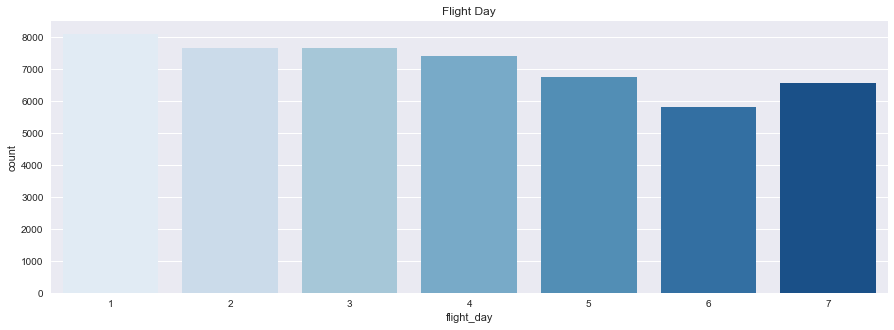

In [34]:
# flight day
plt.figure(figsize=(15, 5))
sns.countplot(x='flight_day', data=data, palette='Blues')
plt.title('Flight Day')
plt.show()

<font color = 'Magenta'> result: </font> Monday is the most fight day follow respectively by thusday and wednesday

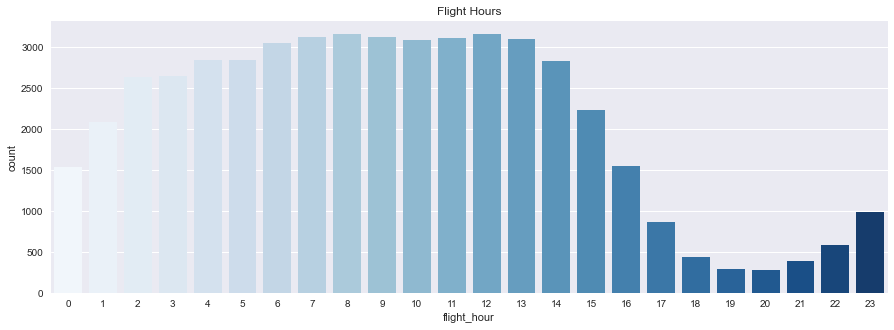

In [35]:
# flight hours
plt.figure(figsize=(15, 5))
sns.countplot(x="flight_hour", data=data, palette='Blues')
plt.title('Flight Hours')
plt.show()

<font color = 'Magenta'> result: </font> most flight occure between 6 AM and 1 PM

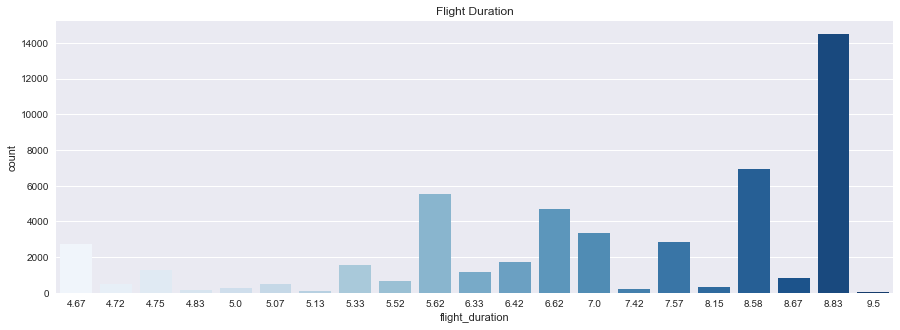

In [36]:
# flight duration
plt.figure(figsize=(15, 5))
sns.countplot(x="flight_duration", data=data, palette='Blues')
plt.title('Flight Duration')
plt.show()

<font color = 'Magenta'> result: </font>
Most of the fights stay about 5 to 9 hours

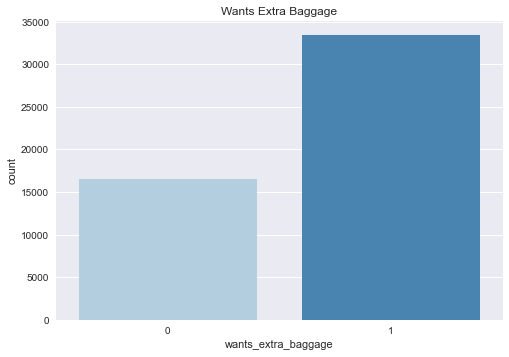

In [37]:
# wants extra baggage
sns.countplot(x='wants_extra_baggage', data=data, palette='Blues')
plt.title('Wants Extra Baggage')
plt.show()

<font color = 'Magenta'> result: </font> most customers Want extra baggage

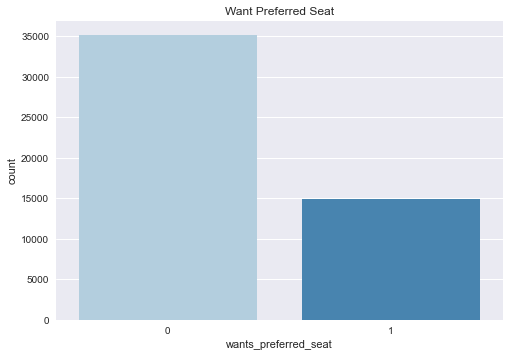

In [38]:
# wants preferred seat
sns.countplot(x='wants_preferred_seat', data=data, palette='Blues')
plt.title('Want Preferred Seat')
plt.show()

<font color = 'Magenta'> result: </font> Less customer  want preferred seat

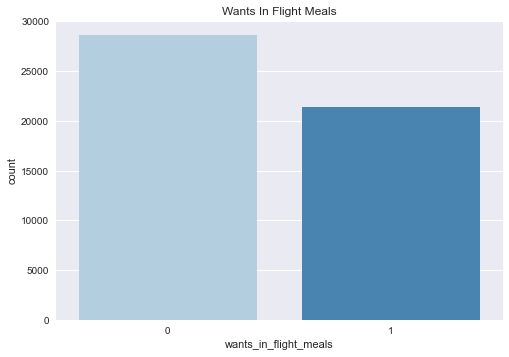

In [39]:
# wants in flight_meals
sns.countplot(x='wants_in_flight_meals', data=data, palette='Blues')
plt.title('Wants In Flight Meals')
plt.show()

<font color = 'Magenta'> result: </font>Less customer want flight Meals

In [40]:
# Converting the flight day column into required format
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

## <font color='indigo' face='Cursive'>Predictive modelling</font>

In [41]:
# Encodeing the "sales_channel" & "trip_types" column using get_dummies() function
dummies= pd.get_dummies(data[['sales_channel','trip_type']])
dummies.head()

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1


In [42]:
data = data.join(dummies)

In [43]:
# droping the categorical columns now
data = df.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1)

In [44]:
#store the target column for supervised learning
target = data['booking_complete']

In [45]:
# droping the target column
data = data.drop('booking_complete', axis=1)

In [46]:
data.isnull().sum()    # checking for null values

num_passengers           0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
dtype: int64

<font color = 'Magenta'> result: </font> the data has no null values

#### <font color='red' face='Cursive'>Normalizing the values</font>

In [47]:
# Scaleing the data using the Standard Scaler to create a scaled DataFrame
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaleing the data
scaled_data = scaler.fit_transform(data)

#create a dataframe of scled data
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)

In [48]:
# add the target back to the dataframe
scaled_data['target']  = target
scaled_data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,target
0,0.400699,1.964934,-0.119386,-0.381721,1.096773,0.703609,-0.649993,-0.863477,-1.174125,0.0
1,-0.579520,0.301163,-0.089878,-1.120714,1.096773,-1.421244,-0.649993,-0.863477,-1.174125,0.0
2,0.400699,1.754190,-0.030863,1.465761,-0.408660,0.703609,1.538479,-0.863477,-1.174125,0.0
3,-0.579520,0.123694,0.234707,-0.935966,1.096773,-1.421244,-0.649993,1.158109,-1.174125,0.0
4,0.400699,-0.186876,-0.030863,1.096264,-0.408660,0.703609,-0.649993,1.158109,-1.174125,0.0


In [49]:
scaled_data = scaled_data.dropna()

In [50]:
# converting 'target' from float to int
scaled_data['target'] = scaled_data['target'].astype(int)

0    42508
1     7476
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

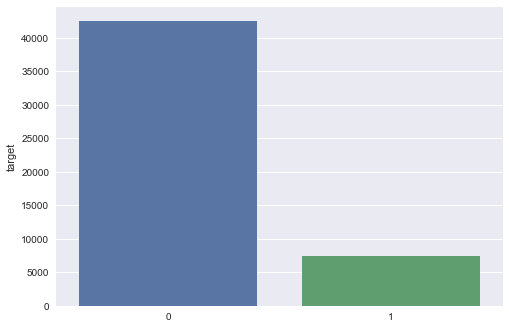

In [51]:
d=scaled_data['target'].value_counts()
print(d)
sns.barplot(scaled_data['target'].unique(),scaled_data['target'].value_counts())

#### <font color='red' face='Cursive'>correlation matrix</font>

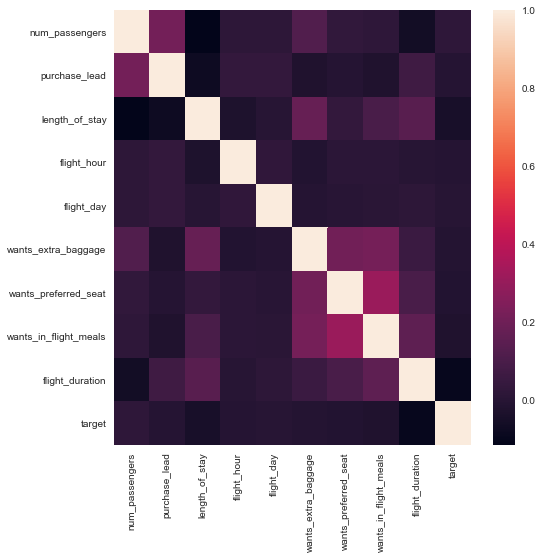

In [52]:
# corelation matrix
corr = scaled_data.corr()

plt.figure(figsize=(8,8))

#plot the heatmap
sns.heatmap(corr)
plt.show()

<font color = 'Magenta'> result: </font>
- people who want meals on flight are related with people who has a preferred seat


#### <font color='red' face='Cursive'>feature selection</font>

In [53]:
# input data
x = scaled_data.drop('target',axis=1)

In [54]:
# output
y = scaled_data['target']

[0.05714608 0.29239721 0.21596046 0.20126495 0.10573462 0.00851515
 0.01247405 0.00768774 0.09881975]


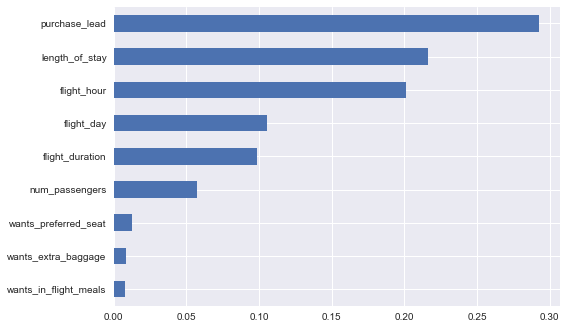

In [55]:
# feature selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()

<font color = 'Magenta'> result: </font> The most important features are purchase_lead , length_of_stay and flight_hour

#### <font color='red' face='Cursive'>Train test split</font>

In [56]:
# train test split
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
x_train.shape ,x_test.shape , y_train.shape , y_test.shape

((39987, 9), (9997, 9), (39987,), (9997,))

#### <font color='red' face='Cursive'>model building</font>

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# random forest model creation
rf_model = RandomForestClassifier(n_estimators=10 , max_depth =50 , min_samples_split=5,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=10,
                       random_state=42)

In [61]:
rf_preds = rf_model.predict(x_test)

In [63]:
print('ACCURACY: ',accuracy_score(y_test,rf_preds)*100)

ACCURACY:  83.91517455236571


In [65]:
# Evaluation of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
m=confusion_matrix(y_test,rf_preds)
m

array([[8341,  167],
       [1441,   48]], dtype=int64)

<Figure size 1600x1100 with 0 Axes>

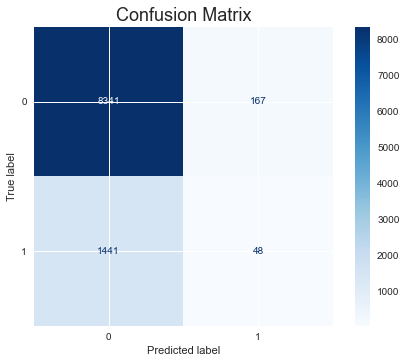

In [68]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200)
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test,cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [69]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8508
           1       0.22      0.03      0.06      1489

    accuracy                           0.84      9997
   macro avg       0.54      0.51      0.48      9997
weighted avg       0.76      0.84      0.78      9997



<font color = 'Magenta'> result: </font>
The model is giving good accuracy we will fit the complete data

In [70]:
# random forest final model
rf_model_final = RandomForestClassifier(n_estimators=10 , max_depth =50 , min_samples_split=5,random_state=42)
rf_model_final.fit(x,y)

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=10,
                       random_state=42)